In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline

In [66]:
N = 1000
K = 500

def paramBootstrap(distr, effective, evaluation):
    evalTheta = np.zeros(K)
    for i in range(0, K):
        #sample = paramDistr.rvs(size=N)
        sample = distr(effective).rvs(size=N)
        evalTheta[i] = evaluation(sample)
    return evalTheta.std() ** 2.0

evaluation = lambda sample: sample.sum() / float(N)

In [71]:
def showGraphs():
    grid = np.arange(0, 1.01, 0.01)
    lowestVar = np.array([])
    effective = np.array([])
    bootstrap = np.array([])
    
    for theta in grid:
        lowestVar = np.append(lowestVar, theta * (1 - theta) / float(N))
        
    plt.figure(figsize=(9, 5))
    plt.plot(grid, lowestVar, label=' $\\frac{1}{I_X(\\theta)}$' )
    plt.ylim((0, 0.0003))
    plt.xlabel('$\\theta$' )
    plt.legend()
    plt.show()
    
    for theta in grid:
        sample = sps.bernoulli(theta).rvs(size=N)
        bootstrap = np.append(bootstrap, \
                              paramBootstrap(sps.bernoulli, \
                                             evaluation(sample),\
                                             evaluation))
    
    plt.figure(figsize=(9, 5))
    plt.plot(grid, lowestVar, label=' $\\frac{1}{I_X(\\theta)}$' )
    plt.plot(grid, bootstrap, label=' $Bootstrap$' )
    plt.ylim((0, 0.0003))
    plt.xlabel('$\\theta$' )
    plt.legend()
    plt.show()

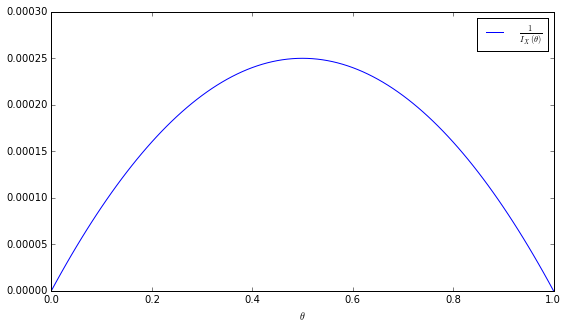

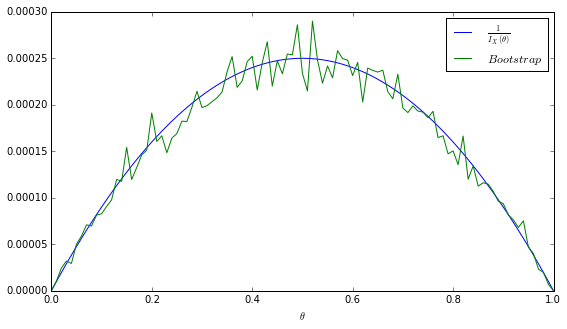

In [72]:
showGraphs()

Нижняя оценка из неравенства Рао-Крамера достигает своего максимума при $\theta = 0.5$, причем чем больше эта оценка, тем сильнее от нее отличается бутстрапная оценка.